In [101]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen import Structure
from matplotlib import pyplot as plt
import numpy as np
cle_api="i76sQnZ5PVPb3vayMHvN"
id_mp="mp-7988"
with MPRester(cle_api) as l:
    structure=l.get_structure_by_material_id(id_mp)
    f=CifWriter(structure)
    f.write_file('structure.cif')
    bandes=l.get_bandstructure_by_material_id(id_mp)

Structure de la bande


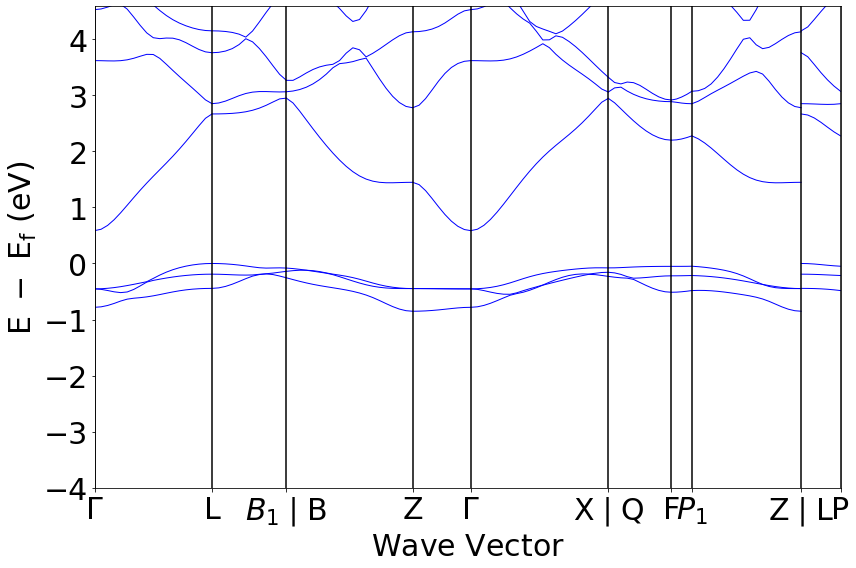

In [102]:
print("Structure de la bande")
bande=plotter.BSPlotter(bandes)
bande.show()

In [103]:
print("1. DÉTERMINATION DE LA BANDE INTERDITE")
print("")
ecart_bande_interdite= bandes.get_band_gap()
print("Energie de la bande interdite:",ecart_bande_interdite["energy"], "[eV]")
print("(-->",ecart_bande_interdite,")")

1. DÉTERMINATION DE LA BANDE INTERDITE

Energie de la bande interdite: 0.5856999999999999 [eV]
(--> {'direct': False, 'energy': 0.5856999999999999, 'transition': 'L-\\Gamma'} )


In [104]:
print("2. TROUVER LA DIRECTION DANS LAQUELLE LA DERNIÈRE (PREMIÈRE) BANDE DE VALENCE (CONDUCTION) PRÉSENTE LE PLUS ET LE MOINS DE DISPERSION (INSÉRER UNE FIGURE INDIQUANT LA DISPERSION PAR DES FLÈCHES)")
print("")
print("")


derniere_bande_valence = bandes.get_vbm()
data=bande.bs_plot_data()
label=data.get('ticks').get('label') 
print(label)
print("")

energie = data.get('energy')
for k in range(0,len(energie[0].get('1'))):
    if energie[0].get('1')[k][0]>2.0:
        probl=k
        break
        
nvdist = np.array([0,1,3,4,6,8,9,11,13,14])
dist=np.zeros(len(nvdist))
distance=np.zeros(len(nvdist)-1)
dist[0]=data.get('ticks').get('distance')[0]
i=1
while i<len(nvdist):
    dist[i]=data.get('ticks').get('distance')[nvdist[i]]
    distance[i-1]=dist[i]-dist[i-1]
    i=i+1

diffval=np.zeros(len(nvdist)-1)
diffcond=np.zeros(len(nvdist)-1)
j=0
while j<len(nvdist)-1:
    diffval[j]=energie[j].get('1')[probl-1][-1]-energie[j].get('1')[probl-1][0]
    diffcond[j]=energie[j].get('1')[probl][-1]-energie[j].get('1')[probl][0]
    j=j+1
    
penteval=np.zeros(len(nvdist)-1)
pentecond=np.zeros(len(nvdist)-1)
for l in range(0,len(nvdist)-1):
    penteval[l]=np.abs(diffval[l])/distance[l]
    pentecond[l]=np.abs(diffcond[l]/distance[l])

print("Les pentes de la bande de valence :" ,penteval)
print("La pente min en valeur absolue de la bande de valance :" ,np.min(abs(penteval)))
print("La pente max en valeur absolue de la bande de valance :" ,np.max(abs(penteval)))
print("")
print("Les pentes de la bande de conduction:",pentecond)
print("La pente max en valeur abolue de la bande de conduction :",np.max(abs(pentecond)))
print("La pente min en valeur absolue de la bande de conduction: ",np.min(abs(pentecond)))

2. TROUVER LA DIRECTION DANS LAQUELLE LA DERNIÈRE (PREMIÈRE) BANDE DE VALENCE (CONDUCTION) PRÉSENTE LE PLUS ET LE MOINS DE DISPERSION (INSÉRER UNE FIGURE INDIQUANT LA DISPERSION PAR DES FLÈCHES)


['$\\Gamma$', 'L', 'L', '$B_1$$\\mid$B', 'Z', 'Z', '$\\Gamma$', '$\\Gamma$', 'X$\\mid$Q', 'F', 'F', '$P_1$', '$P_1$', 'Z$\\mid$L', 'P']

Les pentes de la bande de valence : [2.41159291 0.51634708 1.6181304  2.01726455 2.33516928 1.60735304
 0.50851964 1.03055042 1.35373867]
La pente min en valeur absolue de la bande de valance : 0.5085196433374691
La pente max en valeur absolue de la bande de valance : 2.411592914132451

Les pentes de la bande de conduction: [0.88960365 0.38844963 0.30715809 1.96649369 0.55410293 0.37203853
 0.24161339 0.08922892 0.00346136]
La pente max en valeur abolue de la bande de conduction : 1.9664936885358135
La pente min en valeur absolue de la bande de conduction:  0.0034613619871696286


In [105]:
point1=np.where(penteval == np.max(abs(penteval)))[0][0]
point2=np.where(penteval == np.min(abs(penteval)))[0][0]
point3=np.where(pentecond == np.max(abs(pentecond)))[0][0]
point4=np.where(pentecond == np.min(abs(pentecond)))[0][0]

Dispersion flèches bande de valance:


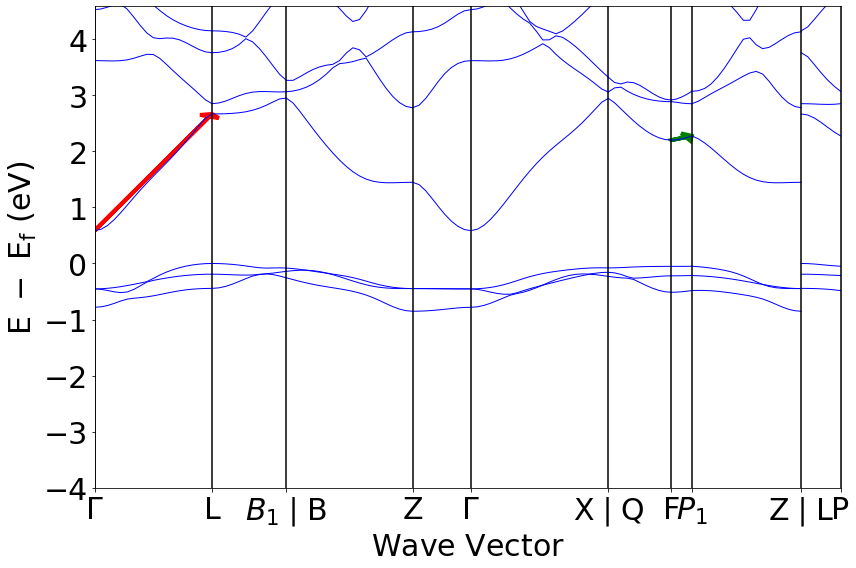

In [106]:
print("Dispersion flèches bande de valance:")
bande.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(dist[point1], (energie[point1].get('1')[probl-1])[0], distance[point1], diffval[point1], head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)
plt.arrow(dist[point2], (energie[point2].get('1')[probl-1])[0], distance[point2], diffval[point2], head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)

Dispersion flèche bande de conduction:


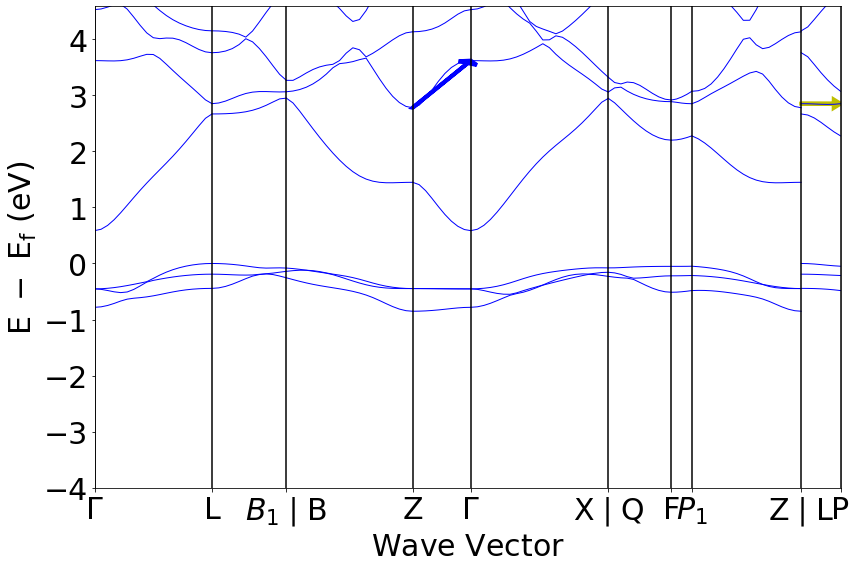

In [107]:
print("Dispersion flèche bande de conduction:")
bande.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)
plt.arrow(dist[point3], (energie[point3].get('1')[probl])[0], distance[point3], diffcond[point3], head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)
plt.arrow(dist[point4], (energie[point4].get('1')[probl])[0], distance[point4], diffcond[point4], head_width=0.15, head_length=0.05, linewidth=4, color='y', length_includes_head=True)

In [108]:
print("3. CALCULER LA MASSE EFFECTIVE AU SOMMET (BASE) DE LA DERNIÈRE (PREMIÈRE) BANDE DE VALENCE (CONDUCTION) EN SUPPOSANT UNE DISPERSION PARABOLIQUE.")
print("")

3. CALCULER LA MASSE EFFECTIVE AU SOMMET (BASE) DE LA DERNIÈRE (PREMIÈRE) BANDE DE VALENCE (CONDUCTION) EN SUPPOSANT UNE DISPERSION PARABOLIQUE.



In [109]:
#utile pour les calculs de la masse
A = 10**(-10)
eV = 1.602176563*10**(-19)
hbar = 1.054571818*10**(-34)

In [110]:
print("Pour trouver la masse effective il faut procéder en plusieurs étapes:")
print("1. Trouver la dispersion")
a=284.9776302596368 #représente le paramètre classique a dans l'expression d'une parabole
print("")
print(a)
print("")
print("2. Trouver la dérivée seconde de la dispersion:")
derivsec=2*a
tot=derivsec*(A**2)*eV
print("")
print(tot)
print("")
print("3. La masse effective se calcule étant comme la constante de Planck au carré divisé par la dérivée seconde de la dispersion:")
masseff=(hbar**2)/tot
print("La masse effective de la dernière bande de valance vaut donc:", masseff, "kg.")


Pour trouver la masse effective il faut procéder en plusieurs étapes:
1. Trouver la dispersion

284.9776302596368

2. Trouver la dérivée seconde de la dispersion:

9.131689603625393e-37

3. La masse effective se calcule étant comme la constante de Planck au carré divisé par la dérivée seconde de la dispersion:
La masse effective de la dernière bande de valance vaut donc: 1.2178706981874405e-32 kg.


In [100]:
print("Pour trouver la masse effective il faut procéder en plusieurs étapes:")
print("1. Trouver la dispersion")
a=9.895851407902 #représente le paramètre classique a dans l'expression d'une parabole
print("")
print(a)
print("")
print("2. Trouver la dérivée seconde de la dispersion:")
derivsec=2*a
tot=derivsec*(A**2)*eV
print("")
print(tot)
print("")
print("3. La masse effective se calcule étant comme la constante de Planck au carré divisé par la dérivée seconde de la dispersion:")
masseff=(hbar**2)/tot
print("La masse effective de la première bande de conduction vaut donc:", masseff, "kg.")



Pour trouver la masse effective il faut procéder en plusieurs étapes:
1. Trouver la dispersion

9.895851407902

2. Trouver la dérivée seconde de la dispersion:

3.170980239334228e-38

3. La masse effective se calcule étant comme la constante de Planck au carré divisé par la dérivée seconde de la dispersion:
La masse effective de la première bande de conduction vaut donc: 3.50718590272049e-31 kg.
